<a href="https://colab.research.google.com/github/Jectrianama/GCCE_TEST/blob/main/GCECDL1/wine_gcce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subclassing for GCCE

In [17]:
!git clone https://github.com/Jectrianama/GCCE_TEST.git

fatal: destination path 'GCCE_TEST' already exists and is not an empty directory.


In [18]:
 
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode 
import numpy as np

def ook(t):
  lb = LabelBinarizer()
  y_ook = lb.fit_transform(t)  

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1) 

  return y_ook

In [19]:
import os
os.chdir('/content/GCCE_TEST/Models')
from  keras_ma_gcce import *
from labels_generation import MA_Clas_Gen
os.chdir('../../')

In [20]:
#cargar datos desde drive otros dataset
FILEID = "1AU8pTtCLihBjCZjWITaAzpnEuL4RO436"
#https://drive.google.com/file/d/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  DataGCCE.zip && rm -rf /tmp/cookies.txt
!unzip -o DataGCCE.zip
!dir

--2023-02-11 05:49:45--  https://docs.google.com/uc?export=download&confirm=&id=1AU8pTtCLihBjCZjWITaAzpnEuL4RO436
Resolving docs.google.com (docs.google.com)... 142.250.31.100, 142.250.31.139, 142.250.31.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.31.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2g5dcqorpfvip19tf90ln0ep0p47slph/1676094525000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=3d607568-c286-4c76-8230-cb5e59c03e0b [following]
--2023-02-11 05:49:45--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2g5dcqorpfvip19tf90ln0ep0p47slph/1676094525000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=3d607568-c286-4c76-8230-cb5e59c03e0b
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 172.253.63.132, 2

In [21]:
#cargar datos desde drive acceso libre
FILEID = "1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW"
#https://drive.google.com/file/d/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MADatasets.zip && rm -rf /tmp/cookies.txt
!unzip -o MADatasets.zip
!dir

--2023-02-11 05:49:46--  https://docs.google.com/uc?export=download&confirm=t&id=1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW
Resolving docs.google.com (docs.google.com)... 142.250.31.100, 142.250.31.139, 142.250.31.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.31.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/seavm1jrikc8htjlhihl8qc5qdtchta5/1676094525000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=dc0bf667-5c9b-4359-8b3c-ef73ca77cdee [following]
--2023-02-11 05:49:46--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/seavm1jrikc8htjlhihl8qc5qdtchta5/1676094525000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=dc0bf667-5c9b-4359-8b3c-ef73ca77cdee
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 172.253.63.132, 

# Load Data

In [22]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
database = 'Wine' #['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']


path_ = 'MADatasets/'+ database+ '.mat' 
Xdata = sio.loadmat(path_)
Xdata.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Y', 'iAnn', 'Exp', 'idxtr', 'idxte'])

In [23]:
X = Xdata['X']
# Xte = Xdata['Xte']
Y = Xdata['Y']
t = Xdata['y'].reshape(-1)
print('X',X.shape,'t',t.shape,'Y',Y.shape)
 

X (178, 13) t (178,) Y (178, 5)


# Labels Generation 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


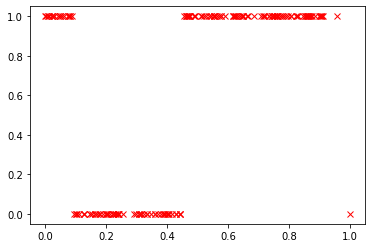

In [24]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,t, R=5, NrP=1)

In [25]:

Y = Y - 1
t = t - 1

annotator 1
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        59
           1       0.82      0.93      0.87        71
           2       0.89      0.81      0.85        48

    accuracy                           0.87       178
   macro avg       0.87      0.86      0.86       178
weighted avg       0.87      0.87      0.86       178

annotator 2
              precision    recall  f1-score   support

           0       0.48      0.24      0.32        59
           1       0.66      0.85      0.74        71
           2       0.57      0.69      0.62        48

    accuracy                           0.60       178
   macro avg       0.57      0.59      0.56       178
weighted avg       0.58      0.60      0.57       178

annotator 3
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        59
           1       0.71      0.51      0.59        71
           2       0.53      0.40      

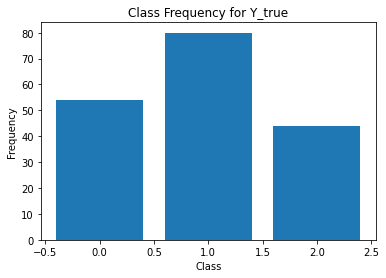

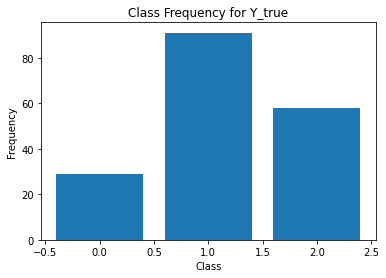

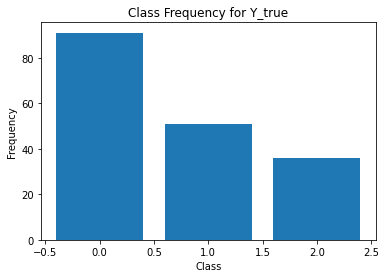

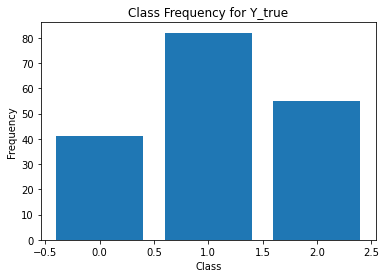

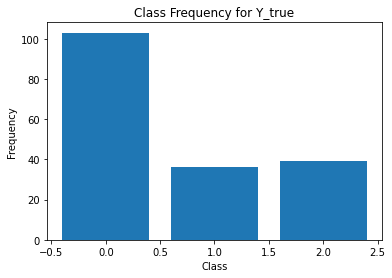

In [26]:
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
#     unique, counts = np.unique(Y_test[5], return_counts=True)
#     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


# Split data

In [27]:
import numpy.matlib
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3,random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[138  60 137  77  90 159  41 136 166  93 154 141 164  33  31 152  82 122
  42  87 139 147 151 162  79 169 157  95  53  10  23  37 134 110 167 120
 142   8  72 114 148 163  36  20 121  28  13  88  24 100 127 143 144  85]
(124, 13) (124, 5) (124, 1)


# Apply MinMaxScaler

In [28]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Testing the Class 


iteration: 0


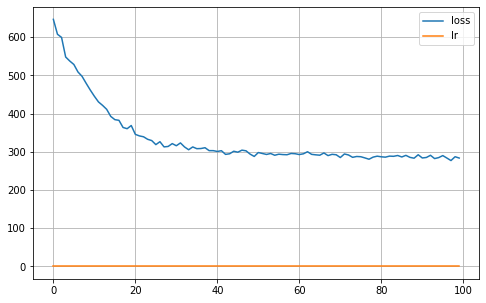

2/2 [==============================] - 0s 4ms/step
Validation ACC: 0.9444
Validation Balanced_ACC: 0.9268
Validation MI: 0.8956
Validation Normalized MI: 0.8242
Validation Adjusted MI: 0.8176
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9959
iteration: 1


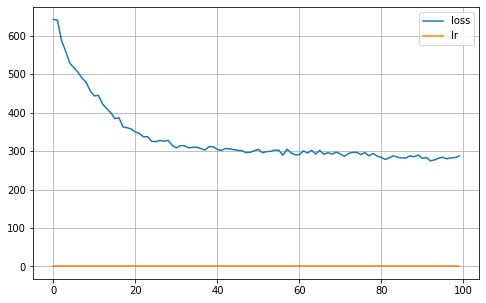

2/2 [==============================] - 0s 7ms/step
Validation ACC: 0.9630
Validation Balanced_ACC: 0.9495
Validation MI: 0.9425
Validation Normalized MI: 0.8681
Validation Adjusted MI: 0.8631
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9969
iteration: 2


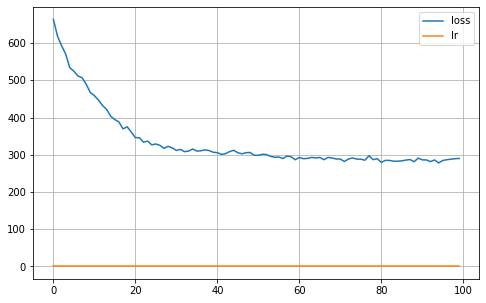

2/2 [==============================] - 0s 6ms/step
Validation ACC: 0.9074
Validation Balanced_ACC: 0.8813
Validation MI: 0.8246
Validation Normalized MI: 0.7596
Validation Adjusted MI: 0.7505
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9979
iteration: 3


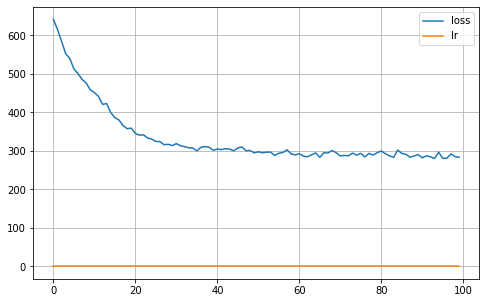

2/2 [==============================] - 0s 7ms/step
Validation ACC: 0.9444
Validation Balanced_ACC: 0.9268
Validation MI: 0.8956
Validation Normalized MI: 0.8242
Validation Adjusted MI: 0.8176
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9990
iteration: 4


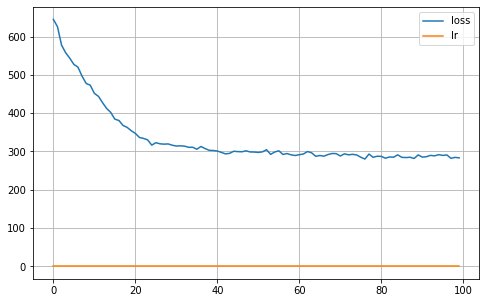

2/2 [==============================] - 0s 7ms/step
Validation ACC: 0.9444
Validation Balanced_ACC: 0.9268
Validation MI: 0.8956
Validation Normalized MI: 0.8242
Validation Adjusted MI: 0.8176
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9979
iteration: 5


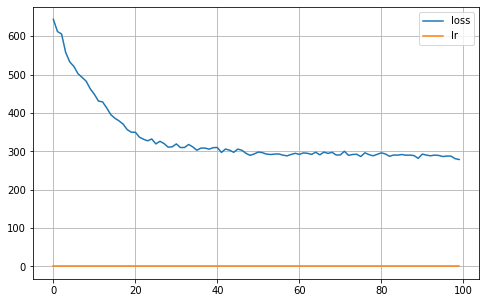

2/2 [==============================] - 0s 4ms/step
Validation ACC: 0.9630
Validation Balanced_ACC: 0.9495
Validation MI: 0.9425
Validation Normalized MI: 0.8681
Validation Adjusted MI: 0.8631
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9995
iteration: 6


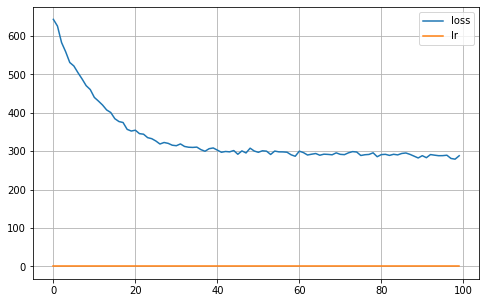

2/2 [==============================] - 0s 6ms/step
Validation ACC: 0.9815
Validation Balanced_ACC: 0.9722
Validation MI: 1.0140
Validation Normalized MI: 0.9356
Validation Adjusted MI: 0.9332
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9995
iteration: 7


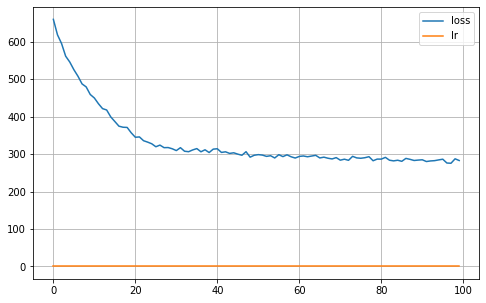

2/2 [==============================] - 0s 5ms/step
Validation ACC: 0.9815
Validation Balanced_ACC: 0.9722
Validation MI: 1.0140
Validation Normalized MI: 0.9356
Validation Adjusted MI: 0.9332
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9959
iteration: 8


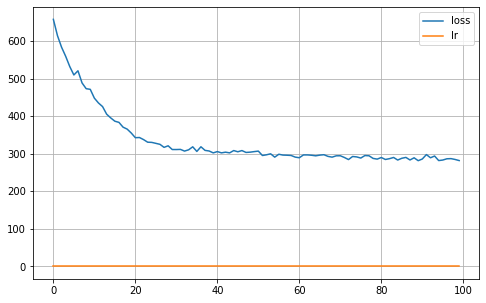

2/2 [==============================] - 0s 11ms/step
Validation ACC: 0.9815
Validation Balanced_ACC: 0.9773
Validation MI: 1.0095
Validation Normalized MI: 0.9318
Validation Adjusted MI: 0.9292
Validation aUc: 1.0000
Validation aUc_Sklearn: 1.0000
iteration: 9


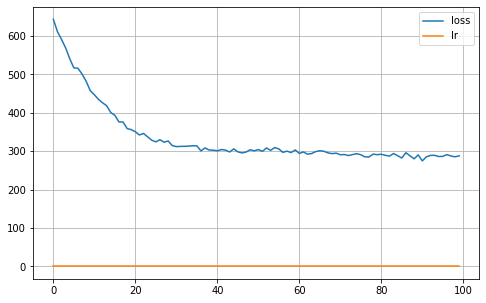

2/2 [==============================] - 0s 9ms/step
Validation ACC: 0.9074
Validation Balanced_ACC: 0.8813
Validation MI: 0.8246
Validation Normalized MI: 0.7596
Validation Adjusted MI: 0.7505
Validation aUc: 0.9875
Validation aUc_Sklearn: 0.9954


In [29]:
from sklearn.metrics import classification_report, balanced_accuracy_score,  roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
l1 =0.1
NUM_RUNS =10
ACC = np.zeros(NUM_RUNS)
AUC = np.zeros(NUM_RUNS)
AUCSK = np.zeros(NUM_RUNS)
MI = np.zeros(NUM_RUNS)
NMI = np.zeros(NUM_RUNS)
AMI = np.zeros(NUM_RUNS)
BACC = np.zeros(NUM_RUNS)
for i in range(NUM_RUNS): #10
    print("iteration: " + str(i))
   
    MA = Keras_MA_GCCE(epochs=100,batch_size=64,R=5, K=len(np.unique(Y_true_train)), dropout=0.25, learning_rate=0.01,optimizer='Adam', 
                l1_param=l1,  validation_split=0, verbose=0, q=0.1, neurons=4)



    MA.fit(X_train, Y_train)
    MA.plot_history()
  
    #Accuracy
    pred_2 = MA.predict(X_test)
 
    report = classification_report( pred_2[:,Y.shape[1]:].argmax(axis=1),Y_true_test.ravel(),output_dict=True)
    ACC[i] = report['accuracy']
    print("Validation ACC: %.4f" % (float(ACC[i])))


    # balanced. Accurcy
    BACC[i] = balanced_accuracy_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze(), adjusted=True)
    print("Validation Balanced_ACC: %.4f" % (float(BACC[i])))

    #MI
    
    MI[i] = mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation MI: %.4f" % (float(MI[i]),))
    NMI[i] = normalized_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Normalized MI: %.4f" % (float(NMI[i]),))
    AMI[i]= adjusted_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Adjusted MI: %.4f" % (float(AMI[i]),))


    #AUC
    val_AUC_metric = tf.keras.metrics.AUC( from_logits = True)  
   # val_logits =MA.predict(X_test) # model(X_test, training=False)
    # tf.print(y_batch_val)
    val_AUC_metric.update_state(Y_true_test, pred_2[:,Y.shape[1]:].argmax(axis=1).astype('float'))

    val_AUC = val_AUC_metric.result()
    val_AUC_metric.reset_states()
    val_AUC = val_AUC.numpy()
    print("Validation aUc: %.4f" % (float(val_AUC),))
    AUC[i] = val_AUC
    val_AUC1 = roc_auc_score(ook(Y_true_test), pred_2[:,Y_train.shape[1]:])
    print("Validation aUc_Sklearn: %.4f" % (float(val_AUC1),))
    AUCSK[i] = val_AUC1


In [30]:

ACC

array([0.94444444, 0.96296296, 0.90740741, 0.94444444, 0.94444444,
       0.96296296, 0.98148148, 0.98148148, 0.98148148, 0.90740741])

In [31]:

AUC

array([0.98750001, 0.98750001, 0.98750001, 0.98750001, 0.98750001,
       0.98750001, 0.98750001, 0.98750001, 1.        , 0.98750001])

In [32]:
print('Average Accuracy: ', np.round( ACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( ACC),4)*100)
print('==============================================')
print('Average AUC: ', np.round( AUC.mean(),4)*100) 
print('Average AUC std: ',np.round(np.std( AUC),4)*100)
print('==============================================')
print('Average AUC Sklearn: ', np.round( AUCSK.mean(),4)*100) 
print('Average AUC SK std: ',np.round(np.std( AUCSK),4)*100)
print('==============================================')
print('Average Balanced Accuracy: ', np.round( BACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( BACC),4)*100)
print('==============================================')
print('Average MI: ', np.round( MI.mean(),4)*100) 
print('Average std: ',np.round(np.std(MI),4)*100)
print('==============================================')
print('Average Normalized MI: ', np.round( NMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(NMI),4)*100)
print('==============================================')
print('Average Ajdusted MI: ', np.round( AMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(AMI),4)*100)

Average Accuracy:  95.19
Average std:  2.64
Average AUC:  98.88
Average AUC std:  0.37
Average AUC Sklearn:  99.78
Average AUC SK std:  0.16
Average Balanced Accuracy:  93.64
Average std:  3.3099999999999996
Average MI:  92.58
Average std:  6.81
Average Normalized MI:  85.31
Average std:  6.35
Average Ajdusted MI:  84.76
Average std:  6.58


In [33]:
import pickle

# create the dictionary with 6 scalar variables
Metrics = {
    'Accuracy': np.round( ACC.mean(),4)*100,
    'Accuracy_std': np.round(np.std( ACC),4)*100,
    'AUC': np.round( AUC.mean(),4)*100,
    'AUC_std': np.round(np.std( AUC),4)*100,
    'AUCSK': np.round( AUCSK.mean(),4)*100,
    'AUCSK_std': np.round(np.std( AUCSK),4)*100,
    'Balanced Accuracy': np.round( BACC.mean(),4)*100,
    'Balanced Accuracy_std':  np.round(np.std(BACC),4)*100,
    'MI': np.round( MI.mean(),4)*100,
    'MI_std': np.round(np.std(MI),4)*100,
    'Normalized MI': np.round( NMI.mean(),4)*100,
    'Normalized MI_std': np.round(np.std(NMI),4)*100,
    'Adjusted MI': np.round( AMI.mean(),4)*100,
    'Adjusted MI_std': np.round(np.std(NMI),4)*100,
}

# save the dictionary to a file using pickle
with open('data.pickle', 'wb') as handle:
    pickle.dump(Metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)
Metrics

{'Accuracy': 95.19,
 'Accuracy_std': 2.64,
 'AUC': 98.88,
 'AUC_std': 0.37,
 'AUCSK': 99.78,
 'AUCSK_std': 0.16,
 'Balanced Accuracy': 93.64,
 'Balanced Accuracy_std': 3.3099999999999996,
 'MI': 92.58,
 'MI_std': 6.81,
 'Normalized MI': 85.31,
 'Normalized MI_std': 6.35,
 'Adjusted MI': 84.76,
 'Adjusted MI_std': 6.35}